### Load Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import cv2
import math
import Cone

path = 'C:/Users/EXTHuaXia/Desktop/Cone/154941 MV Center/8pics'
file_name = os.listdir(path)
filename = [os.path.join(path,i)for i in file_name]

In [2]:
file_name

['G-180_T0.his',
 'G-90_T0.his',
 'G0_T-45.his',
 'G0_T-90.his',
 'G0_T0.his',
 'G0_T45.his',
 'G0_T90.his',
 'G90_T0.his']

### Start Analysis (Ball_Size: 2Radius mm, Cone_Size:2Radius mm)

In [3]:
img = Cone.Read_File(filename)
## Enter information ##
RS,IR,OR = Cone.Enter_Inf(Ball_Size = 8,Cone_Size = 50)
## Finding the IsoCenter ##
test_img,cir_in,cir_out,cir_error = Cone.Find_Circles(img,IR,OR,RS)

Ball Radius: 4.0 mm; Cone Radius: 25.0 mm
Pixel_Size:0.2539
Ball Size Pixels:16; Cone Size Pixels:99
The 0th in_cirlces:[[[512.64954 517.14154  15.3797 ]
  [511.52652 513.7725   11.39305]
  [523.8795  509.28052  12.7968 ]
  [480.08252 582.2755   11.5615 ]
  [502.5425  620.4575   12.6845 ]]]
The 0th in_cirlces:[[[512.64954 517.14154  15.3797 ]
  [511.52652 513.7725   11.39305]]]
The 0th in_cirlces:[[[512.64954 517.14154  15.3797 ]
  [511.52652 513.7725   11.39305]]]
The 0th in_cirlces:[[[512.64954 517.14154  15.3797 ]
  [511.52652 513.7725   11.39305]]]
The 0th out_cirlces:[[[514.64  519.12   99.376]]]
The 0th out_cirlces:[[[514.64  519.12   99.376]]]
The 0th out_cirlces:[[[514.64  519.12   99.376]]]
[0]
[0]
[0]
[0]
The 1th in_cirlces:[[[516.0185   514.8955    15.3797  ]
  [508.1575   507.03452   15.267401]
  [553.0775   568.7995    15.3797  ]]]
The 1th in_cirlces:[[[516.0185   514.8955    15.3797  ]
  [508.1575   507.03452   15.267401]]]
The 1th in_cirlces:[[[516.0185 514.8955  15.3797

In [4]:
df,df2,df3 = Cone.table_output(file_name,cir_error)

### <font color=#0000FF>Table 2: 3D Displacements</font>

In [5]:
df3

,Coordinate System,Elekta Bipolar
0,dX(mm),-0.1
1,dY(mm),-0.24
2,dZ(mm),0
3,3D Displacement(mm),0.26
4,Tolerance(mm),1
5,Pass-Fall,Pass
6,SDx(mm),0.32
7,SDy(mm),0.45
8,SDz(mm),0.22


### <font color=#0000FF>Table 3: Image List and Results</font>

In [6]:
df

,Gantry,Couch,Vertical(mm),Horizontal(mm)
0,-180,0,-0.50,-0.51
1,-90,0,0.06,-0.22
2,0,0,0.63,-0.22
3,90,0,0.06,-0.22
4,0,90,-0.22,-0.22
5,0,45,0.35,-0.51
6,0,-45,0.92,-0.22
7,0,-90,0.63,0.06


### <font color=#0000FF>Table 4: Expanded Analysis Results</font>

In [7]:
df2

,Gantry,Couch,X-Proj(mm),Y-Proj(mm),Z-Proj(mm),GT(mm),AB(mm),R(mm)
0,-180,0,0.51,0.50,No Projection,-0.50,-0.51,0.71
1,-90,0,No Projection,-0.06,0.22,0.06,-0.22,0.23
2,0,0,-0.22,-0.63,No Projection,0.63,-0.22,0.67
3,90,0,No Projection,-0.06,-0.22,0.06,-0.22,0.23
4,0,90,-0.22,0.22,No Projection,-0.22,-0.22,0.31
5,0,45,-0.51,-0.35,No Projection,0.35,-0.51,0.62
6,0,-45,-0.22,-0.92,No Projection,0.92,-0.22,0.95
7,0,-90,0.06,-0.63,No Projection,0.63,0.06,0.63


### <font color=#0000FF>Figure 1: Image List</font>

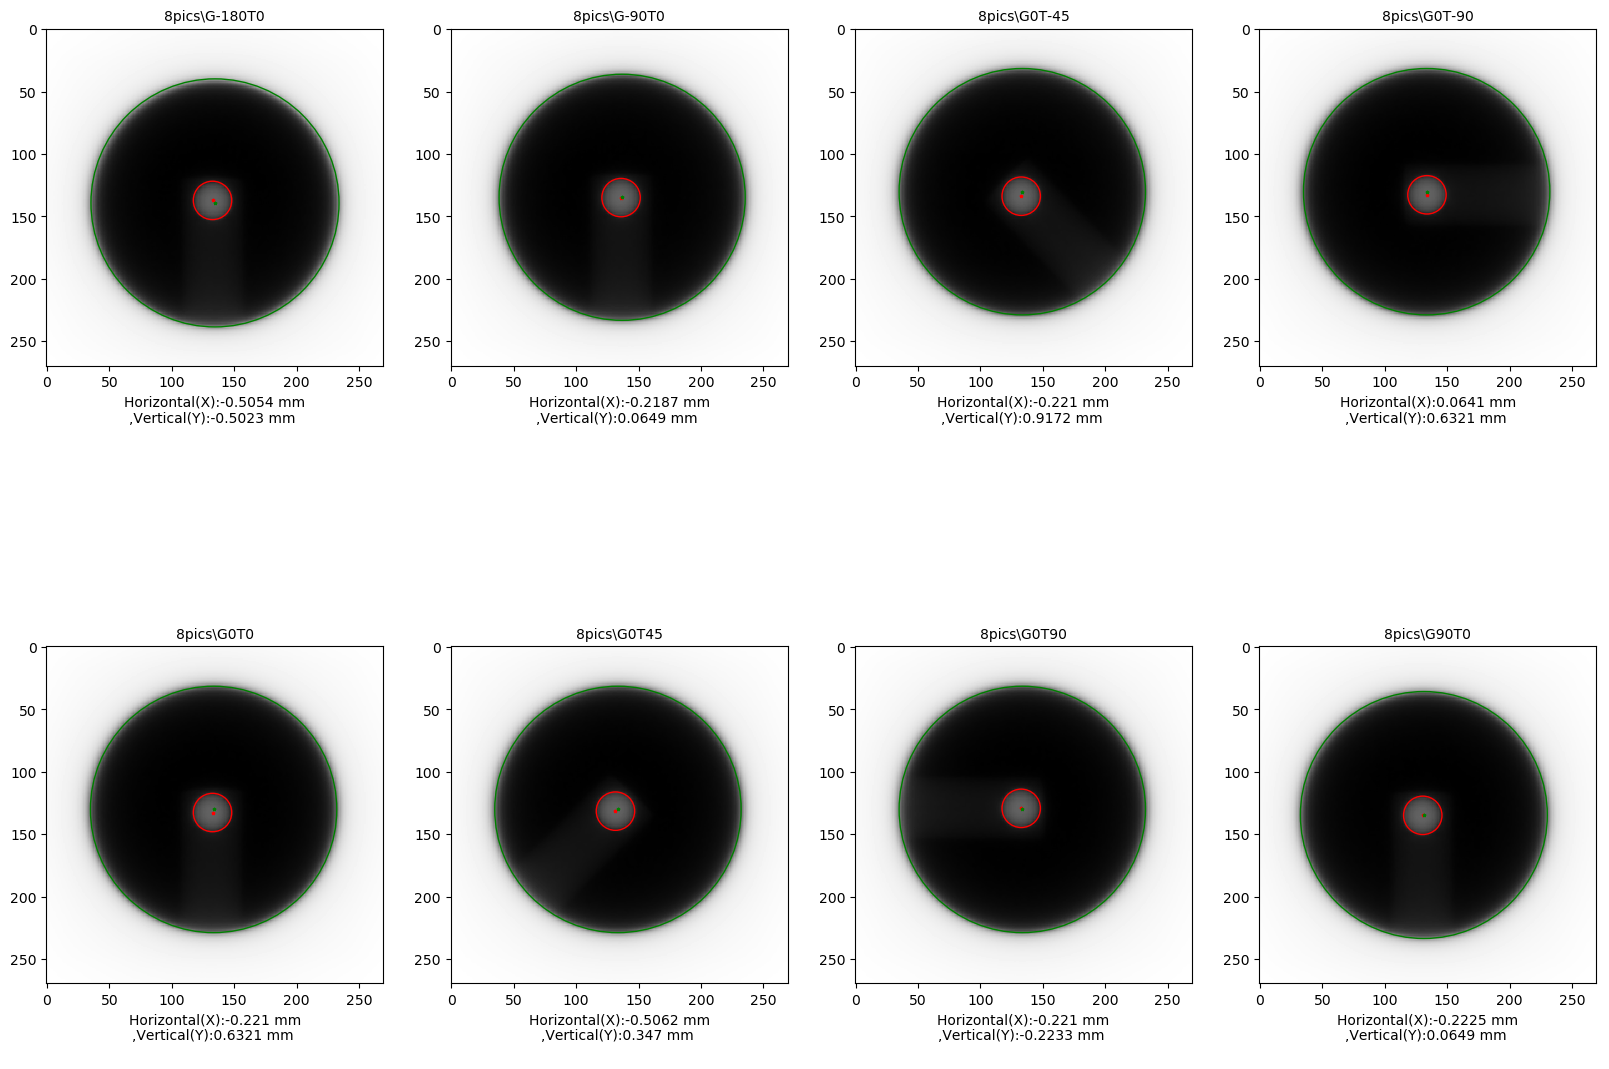

In [8]:
Cone.Plot(test_img,cir_in,cir_out,cir_error,filename)

### <font color=#0000FF>Figure 2: Axis Projection Detail</font>

In [9]:
x1 = np.array([item for item in df2['X-Proj(mm)'] if item != 'No Projection'])
x2 = np.array([item for item in df2['Y-Proj(mm)'] if item != 'No Projection'])
x3 = np.array([item for item in df2['Z-Proj(mm)'] if item != 'No Projection'])
y1 = np.array([0.25]*len(x1))
y2 = np.array([0.25]*len(x2))
y3 = np.array([0.25]*len(x3))
Y1 = np.mean(x1[0:2])
Y2 = np.mean(x2[0:4])
Y3 = np.mean(x3[0:2])
SD1 = np.std(x1[0:2])
SD2 = np.std(x2[0:4])
SD3 = np.std(x3[0:2])
Y1_ = np.mean(x1)
Y2_ = np.mean(x2)
Y3_ = np.mean(x3)
print(round(Y1_,3),round(Y2_,3),round(Y3_,3))
print(round(SD1,3),round(SD2,3),round(SD3,3))

-0.1 -0.241 0.0
0.365 0.4 0.22


In [20]:
# ## x1,y1 projection onto X axis
# ## x2,y2 projection onto Y axis
# ## x3,y3 projection onto Z axis
# # x1 = [0.51,-0.22,-0.22,-0.51,-0.22,0.06]
# # y1 = [0.25,0.25,0.25,0.25,0.25,0.25]
# # x2 = [0.5,-0.06,-0.63,-0.06,0.22,-0.35,-0.92,-0.63]
# # y2 = [0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25]
# # x3 = [0.22,-0.22]
# # y3 = [0.25,0.25]
# Y1 = sum(x1[0:2])/len(x1[0:2])
# Y2 = sum(x2[0:5])/len(x2[0:5])
# Y3 = sum(x3[0:2])/len(x3[0:3])
# Y1_ = sum(x1)/len(x1)
# Y2_ = sum(x2)/len(x2)
# Y3_ = sum(x3)/len(x3)
# print(round(Y1_,3),round(Y2_,3),round(Y3_,3))

# x1_ = np.std(np.array(x1))
# x2_ = np.std(np.array(x2))
# x3_ = np.std(np.array(x3))
# print(round(x1_,3),round(x2_,3),round(x3_,3))

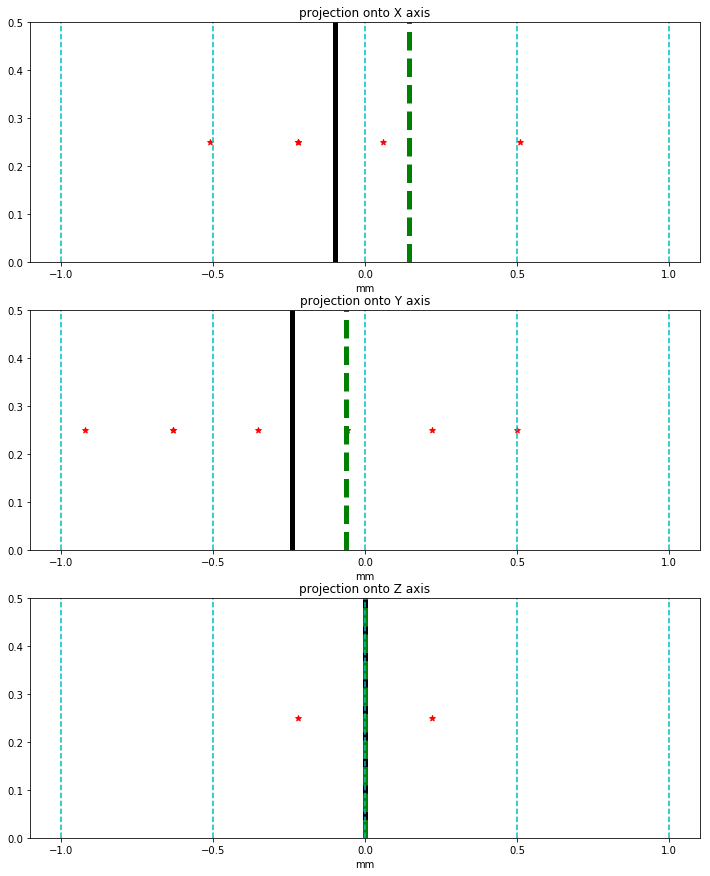

In [10]:
Cone.Axis_Proj(x1,y1,x2,y2,x3,y3,Y1,Y1_,Y2,Y2_,Y3,Y3_)

### <font color=#0000FF>Figure 3: Beam Deviation Plot</font>

In [11]:
x = [-180,-90,0,90,180]
y1,y2,y3 = [],[],[]
y1 = list(df2['GT(mm)'][0:4])
y2 = list(df2['AB(mm)'][0:4])
y3 = list(df2['R(mm)'][0:4])

In [12]:
y1.append(y1[0])
y2.append(y2[0])
y3.append(y3[0])
print(y1,y2,y3)

[-0.5, 0.06, 0.63, 0.06, -0.5] [-0.51, -0.22, -0.22, -0.22, -0.51] [0.71, 0.23, 0.67, 0.23, 0.71]


           4             3            2
1.461e-09 x - 1.549e-21 x - 8.22e-05 x - 4.328e-17 x + 0.63             4             3             2
-3.683e-10 x + 1.736e-22 x + 2.984e-06 x + 5.352e-18 x - 0.22            4            3             2
2.286e-09 x - 1.71e-21 x - 7.284e-05 x - 4.762e-17 x + 0.67


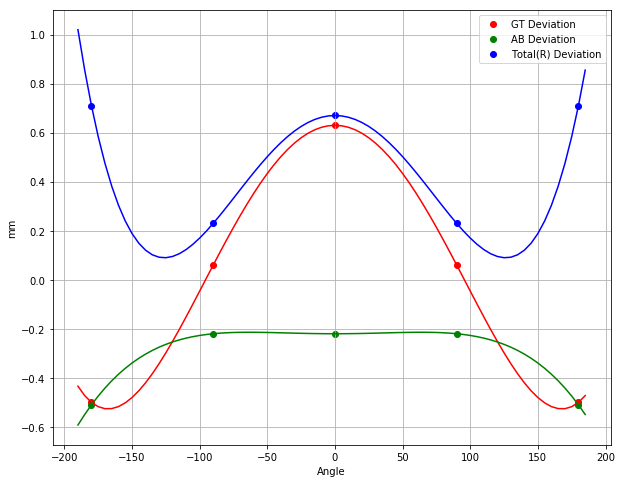

In [13]:
Cone.Beam_Deviation(x,y1,y2,y3)